# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

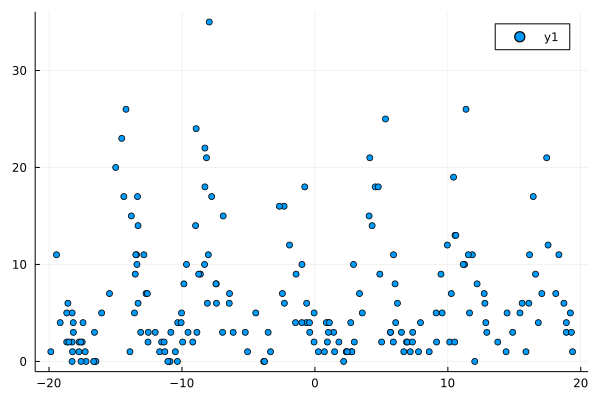

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:03
  iter:  20
  ELBO:  -589.6258541831348
[ Info: Training ended after 20 iterations. Total number of iterations 20
  4.047789 seconds (6.85 M allocations: 416.552 MiB, 11.73% gc time, 98.49% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.2783855787431189, 0.5685939370645607, 0.4776500960614456, 0.19679047218550882, 0.48428899801930525, 0.5958986055385298, 0.3151417063620465, 0.5598710897077602, 0.26609579261732286, 0.46754156985579687  …  0.3735470865485896, 0.36179527443748755, 0.5739488021496421, 0.4242056111441287, 0.40588105246409417, 0.18577026587067857, 0.17682152929491943, 0.2399742657538849, 0.4101990785594553, 0.5399189835373126], θ = [3.9743657994900836, 15.095478500786474, 8.341997859355308, 6.977496690934448, 6.866321790321175, 2.428557658812647, 4.9590259267739745, 4.8733615616386645, 7.456056765742944, 2.9465199641111015  …  2.965595633581818, 3.956931717891085, 3.40698292088323, 8.374787848902718, 3.4527295777397877, 3.4899690268197934, 7.480519746145666, 3.4832997687166705, 2.9586301426150983, 2.9291854902528938]), opt_state = (NamedTuple(),), hyperopt_state = (Na

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -747.5027891690371
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.818069 seconds (4.34 M allocations: 302.686 MiB, 10.81% gc time, 84.59% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.322265141653958) infered by Analytic Variational Inference , (local_vars = (c = [0.17729030727910586, 0.5473288247466082, 0.41312839517122457, 0.24697188276245513, 0.4308421656347301, 0.8019455299071293, 0.5098491632282289, 0.7508827518094998, 0.15758776933102045, 0.6673873218265726  …  0.42859900458872885, 0.5791481650945703, 0.7789657732723783, 0.33811894350102467, 0.3187693117506752, 0.3518946433679253, 0.20207004833648953, 0.41373087183629376, 0.5942588504433505, 0.763668333563515], θ = [4.941798469222487, 15.26817652772882, 8.783186082959588, 8.335374232323842, 7.232423954951365, 4.6238687318061045, 6.74808593168455, 6.934419888115071, 8.453159595863902, 4.992981793947905  …  4.449117416378109, 5.881271331037992, 5.596564898537708, 8.970541792765989, 4.026767084402522, 5.089004232306917, 8.787481567033408, 5.172895103589326, 4.845273243670208, 5.100390258249546], γ = [6.909471700510609, 5.294885581848113, 5.8155094873

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

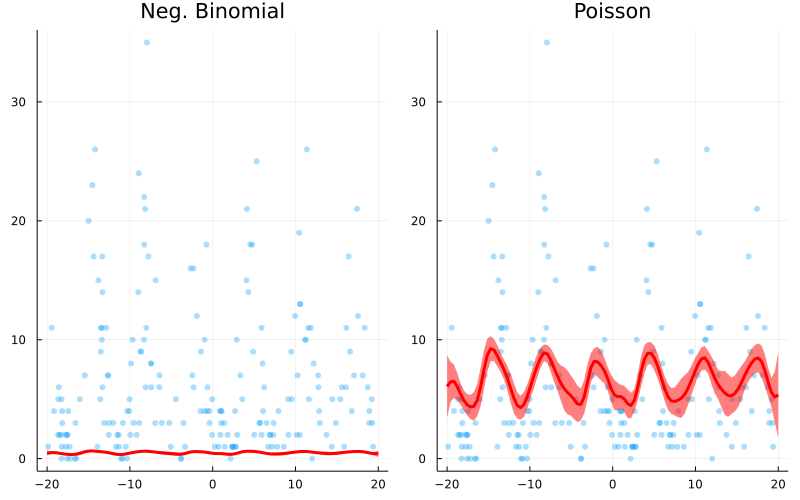

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*